# Pymaceuticals Inc.
---

### Analysis

- 1. Per the linear regression model, there is high positive correlation between weight and avg tumor volume. Perhaps there should be further study on the effects of weight and tumor size. For example according to the box plot, the majority of the tumors plotted occur when the mouse weight is 19g or greater.

- 2. The Capomulin and Ramicane regiments appear to be the most effective course in lowering tumor size.  

- 3. Although the gender distribution for this study is fairly even (51/49 male/female), further analysis is needed to determine if one or any of the treatment regiments in the study is more     effective on a particular gender.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
total_data = pd.merge(mouse_metadata, study_results, how='outer')

# Display the data table for preview
total_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
mice_count = total_data["Mouse ID"].value_counts()
total_mice = len(mice_count)
total_mice

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup_mice = total_data.loc[total_data.duplicated(subset=['Mouse ID', 'Timepoint',]),'Mouse ID'].unique()
dup_mice

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
dup_mice_id = pd.DataFrame(dup_mice)
dup_mice_id

,0
0,g989


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = total_data[total_data['Mouse ID'].isin(dup_mice)==False]

In [6]:
# Checking the number of mice in the clean DataFrame.
clean_mice=clean_df["Mouse ID"].value_counts()
clean_total_mice=len(clean_mice)
clean_total_mice

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

#creating variables
group_df = clean_df.groupby('Drug Regimen')["Tumor Volume (mm3)"]


Mean = group_df.mean()
Median = group_df.median()
VAR = group_df.var()
STD = group_df.std()
SEM = group_df.sem()

clean_stats = {
    'Mean': Mean,
    'Median': Median,
    'VAR': VAR,
    "STD": STD,
    'SEM': SEM
}

#creating table
sum_stats_table = pd.DataFrame(clean_stats)

sum_stats_table



,Mean,Median,VAR,STD,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
agg_stats = group_df.agg(['mean','median','var','std','sem'])
agg_stats


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

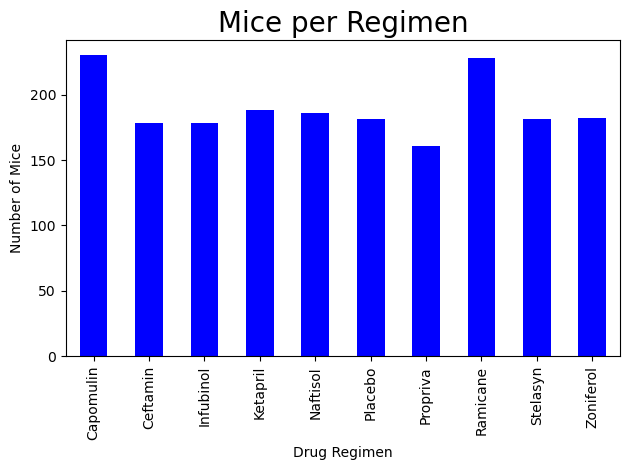

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
mice_per_reg = total_data.groupby(["Drug Regimen"]).count()["Mouse ID"] 


plot_pandas = mice_per_reg.plot.bar(color='b',fontsize = 10)
mice_per_reg
plt.xlabel("Drug Regimen",fontsize = 10)
plt.ylabel("Number of Mice",fontsize = 10)
plt.title("Mice per Regimen",fontsize = 20)

plt.savefig("../Images/Pan_mice_per_regimen.png", bbox_inches = "tight")
plt.tight_layout()
plt.show()


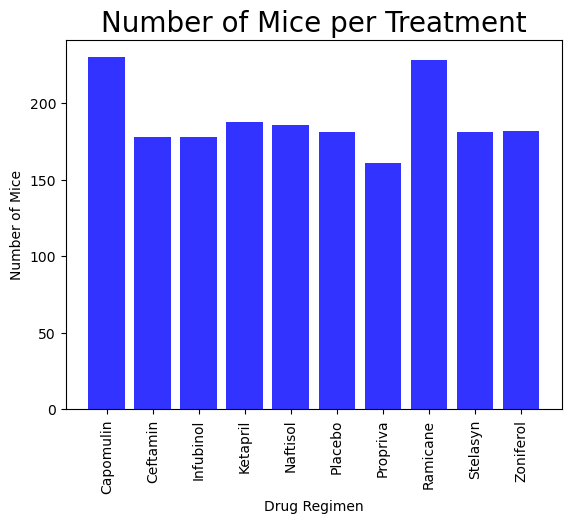

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
mice_list =(total_data.groupby(["Drug Regimen"])["Mouse ID"].count()).tolist()

x_axis = np.arange(len(mice_per_reg))
plt.bar(x_axis, mice_list, color='b', alpha=0.8, align='center')

tick_locations = [value for value in x_axis]

plt.xticks(tick_locations, ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'],  rotation='vertical')

plt.title("Number of Mice per Treatment",fontsize = 20)
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")

plt.savefig("../Images/mat_mice_per_treat.png", bbox_inches = "tight")


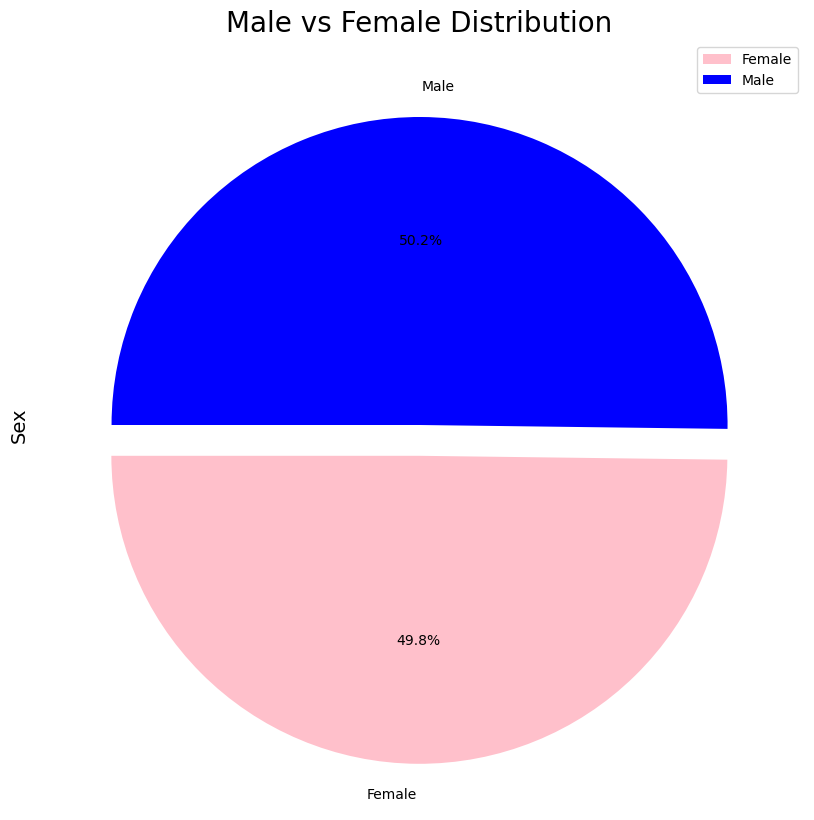

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
groupby_gender = total_data.groupby(["Mouse ID","Sex"])
groupby_gender
gender_df = pd.DataFrame(groupby_gender.size())

#gender_df

mouse_gender = pd.DataFrame(gender_df.groupby(["Sex"]).count())
mouse_gender.columns = ["Total Count"]

mouse_gender["Treatment %"] = (100*(mouse_gender["Total Count"]/mouse_gender["Total Count"].sum()))


#mouse_gender

colors = ['pink', 'blue']
explode = (0.1, 0)
plot = mouse_gender.plot.pie(y='Total Count',figsize=(15,10), colors = colors, startangle=180, explode = explode, shadow = False, autopct="%1.1f%%")

plt.title('Male vs Female Distribution',fontsize = 20)
plt.ylabel('Sex',fontsize = 14)


plt.savefig("../Images/pi_pandas.png", bbox_inches = "tight")
plt.show()

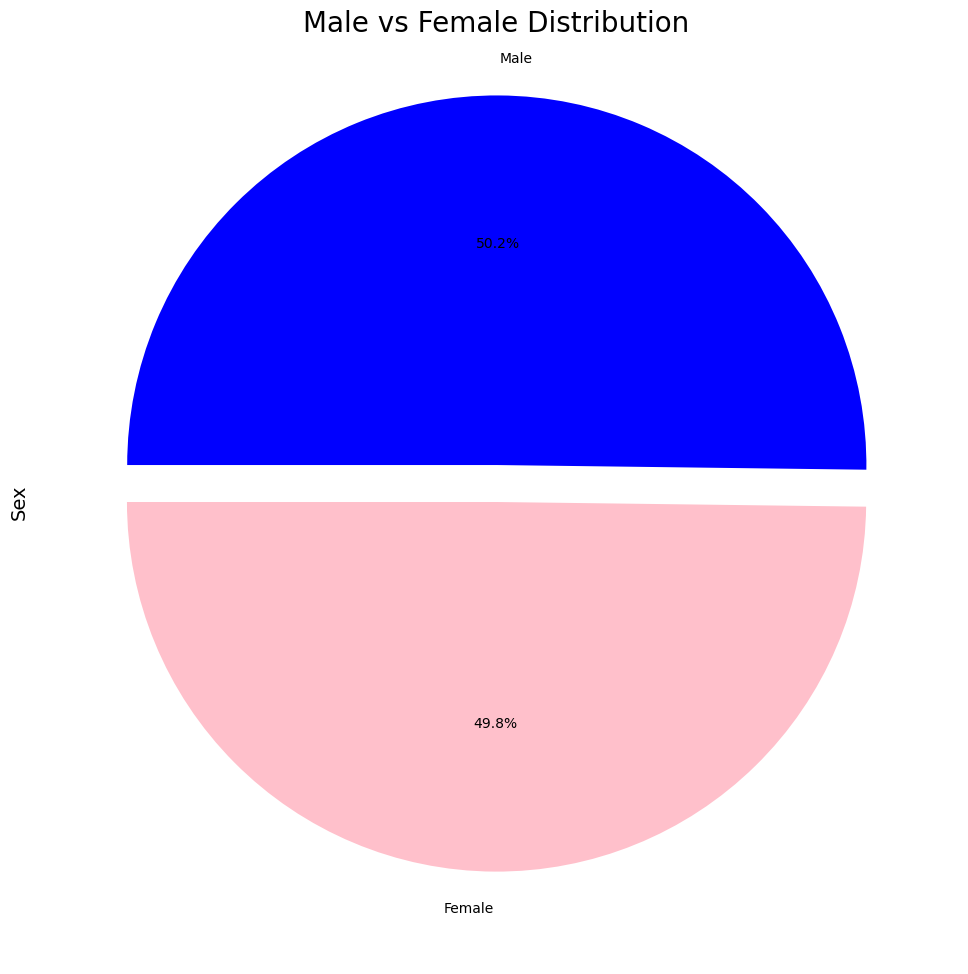

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

labels = ["Female","Male"]
sizes = [49.799197,50.200803]
colors = ['pink', 'blue']
explode = (0.0, 0.1)

fig1, ax1 = plt.subplots(figsize=(15, 12))
plt.pie(sizes, explode=explode,labels=labels, colors=colors, autopct="%1.1f%%", shadow=False, startangle=180,)
plt.title('Male vs Female Distribution',fontsize = 20)
plt.ylabel('Sex',fontsize = 14)

plt.savefig("../Images/pi_plot.png", bbox_inches = "tight")
plt.show()


## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
regimen_df = clean_df[(clean_df["Drug Regimen"] == "Capomulin") |
                        (clean_df["Drug Regimen"] == "Ramicane")  |
                        (clean_df["Drug Regimen"] == "Infubinol") |
                        (clean_df["Drug Regimen"] == "Ceftamin")
                       ]
max_timepoint = regimen_df.groupby("Mouse ID")["Timepoint"].max()
max_timepoint_df = pd.DataFrame(max_timepoint)


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merge_drug = pd.merge(max_timepoint_df, clean_df, on=("Mouse ID","Timepoint"), how = 'left')
merge_drug_df = pd.DataFrame(merge_drug)
merge_drug_df

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a275,45,Ceftamin,Female,20,28,62.999356,3
3,a411,45,Ramicane,Male,3,22,38.407618,1
4,a444,45,Ramicane,Female,10,25,43.047543,0
...,...,...,...,...,...,...,...,...
95,y769,45,Ceftamin,Female,6,27,68.594745,4
96,y793,45,Capomulin,Male,17,17,31.896238,2
97,y865,45,Ceftamin,Male,23,26,64.729837,3
98,z578,45,Ramicane,Male,11,16,30.638696,0


In [20]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data_list = []
outliers_list = []

for treatment in treatment_list:
    print(f"{treatment}:")
    tumor_vol_data = merge_drug.loc[merge_drug["Drug Regimen"] == treatment, :]
    
    tumor_vol_data_list.append(tumor_vol_data['Tumor Volume (mm3)'])
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    quartiles = tumor_vol_data['Tumor Volume (mm3)'].quantile([0.25, 0.5, 0.75])
    IQR = quartiles[0.75] - quartiles[0.25]
    

    
    # Determine outliers using upper and lower bounds
    lower_bound = quartiles[0.25] - (1.5*IQR)
    upper_bound = quartiles[0.75] + (1.5*IQR)
    print(f"The first quartile of {treatment} is {quartiles[0.25]}")
    print(f"The median value of {treatment} is {quartiles[.5]}")
    print(f"The third quartile of {treatment} is {quartiles[0.75]}")
    print(f"The IQR value of {treatment} is {IQR}")
    print(f"The outliers of {treatment} would be below {lower_bound}")
    print(f"The outliers of {treatment} would be above {upper_bound}")
    print("----------------------------------------------------------\n")

Capomulin:
The first quartile of Capomulin is 32.37735684
The median value of Capomulin is 38.1251644
The third quartile of Capomulin is 40.1592203
The IQR value of Capomulin is 7.781863460000004
The outliers of Capomulin would be below 20.70456164999999
The outliers of Capomulin would be above 51.83201549
----------------------------------------------------------

Ramicane:
The first quartile of Ramicane is 31.56046955
The median value of Ramicane is 36.56165229
The third quartile of Ramicane is 40.65900627
The IQR value of Ramicane is 9.098536719999998
The outliers of Ramicane would be below 17.912664470000003
The outliers of Ramicane would be above 54.30681135
----------------------------------------------------------

Infubinol:
The first quartile of Infubinol is 54.04860769
The median value of Infubinol is 60.16518046
The third quartile of Infubinol is 65.52574285
The IQR value of Infubinol is 11.477135160000003
The outliers of Infubinol would be below 36.83290494999999
The outlie

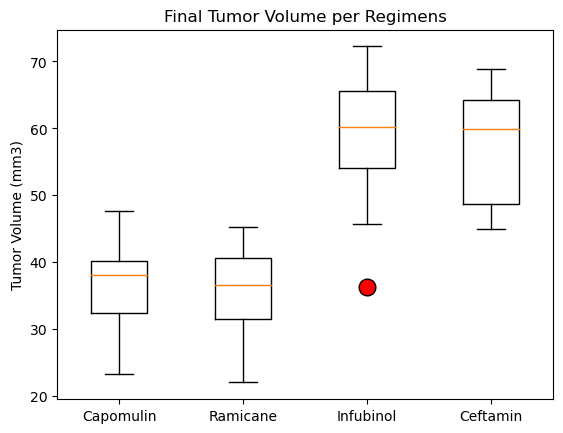

In [21]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

fig, ax = plt.subplots()
ax.set_title('Final Tumor Volume per Regimens')
ax.set_ylabel('Tumor Volume (mm3)')
props = dict(markerfacecolor = 'red', markersize = 12)
plt.boxplot(tumor_vol_data_list,labels=treatment_list,flierprops = props)

plt.show()


## Line and Scatter Plots

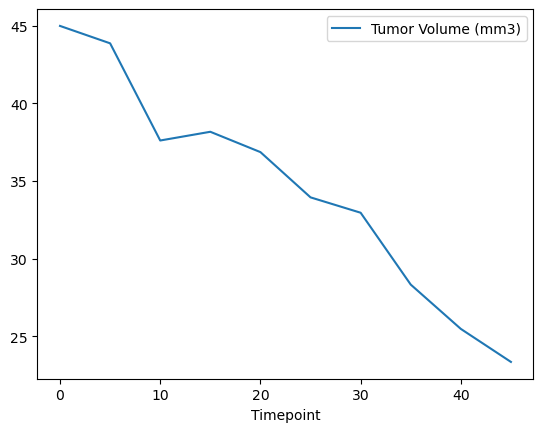

In [22]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

random_MouseID = clean_df.loc[(clean_df['Drug Regimen'] == 'Capomulin')].iloc[0]['Mouse ID']
random_data = clean_df.loc[(clean_df['Mouse ID'] == random_MouseID)]

random_data.plot(kind='line', x='Timepoint', y='Tumor Volume (mm3)')

plt.show()


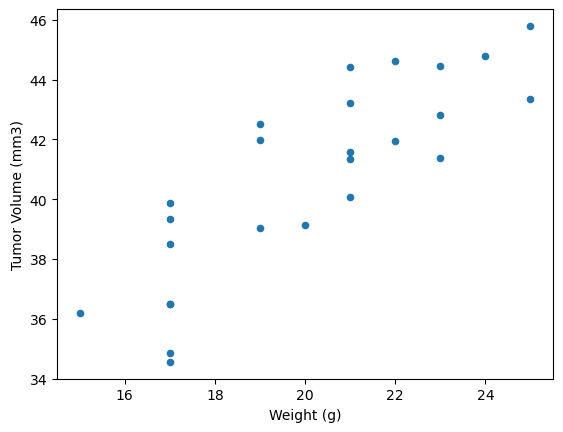

In [23]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

capomulin_data = clean_df.loc[(clean_df['Drug Regimen'] == 'Capomulin')]
avg_vol_data = capomulin_data.groupby("Mouse ID")[['Weight (g)', 'Tumor Volume (mm3)']].mean()

avg_vol_data.plot(kind='scatter', x='Weight (g)', y='Tumor Volume (mm3)')

plt.show()


## Correlation and Regression

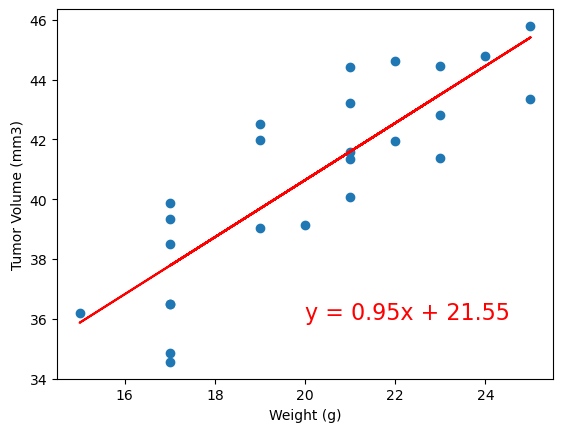

In [25]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

#linear regression model 
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(avg_vol_data['Weight (g)'], avg_vol_data['Tumor Volume (mm3)'])
regress_values = avg_vol_data['Weight (g)'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#avg_volume_data.plot(kind='scatter', x='Weight (g)', y='Tumor Volume (mm3)')
plt.scatter(avg_vol_data['Weight (g)'], avg_vol_data['Tumor Volume (mm3)'])
plt.plot(avg_vol_data['Weight (g)'],regress_values,"r-")
plt.annotate(line_eq,(20,36),fontsize=16,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')

plt.show()


In [26]:
# Calculate the correlation
correlation = st.pearsonr(avg_vol_data['Weight (g)'], avg_vol_data['Tumor Volume (mm3)'])
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.84
